# Multivariate Visualizations
## Joseph Lim

This is one of the practice (non-required) assignments for Coding Dojo's Data Science bootcamp. It is given during the third week of the first stack, and is intended to solidify students' understanding of creating multivariate visualizations.

Students are not provided with a starter notebook. Students should have completed prior assignments, and therefore have a copy of cleaned data, but in the event they have not, data from the titanic data set is provided to them.

Students are asked to provide the following multivariate plots:
1. A countplot of passengers by sex, colored by if they Survived or not.
  * Which group had the highest number of survivors?
2. A barplot of the average number of "Parents or Children" for those that Survived vs. those that died.
  * Which group had a higher average number of Parents or Children?
3. Plot a correlation heatmap of all of the numeric columns
  * Which column had the highest positive correlation to the "Survived" column?

This assignment also provides a good base for students to begin interpreting their graphs, so a small interpretation is provided. Where relevant, multiple ways of creating the same graph using different libraries (matplotlib and seaborn) are shown.

## Data and Library Importation

In [2]:
# Importing Numpy and Pandas
import numpy as np
import pandas as pd

#importing matplotlib and seaborn for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

#importing google colab
from google.colab import drive

In [3]:
#mounting drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
#importing in data
filepath = "/content/drive/MyDrive/Colab Notebooks/Fundamentals: 1/data-cleaning-core.csv"

df = pd.read_csv(filepath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Siblings or Spouses,Parents or Children,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.25,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.28,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.93,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.10,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.05,S


## Countplots

Displaying a countplot of passengers by sex, colored by if they survived or not.

Which group had the highest number of survivors

In [5]:
#Creating list for countplot later on for interpretability
survival_labels = ["No", "Yes"]

### Seaborn Plot

<Axes: title={'center': 'Non-Survivors vs. Survivors'}, xlabel='Survived', ylabel='count'>

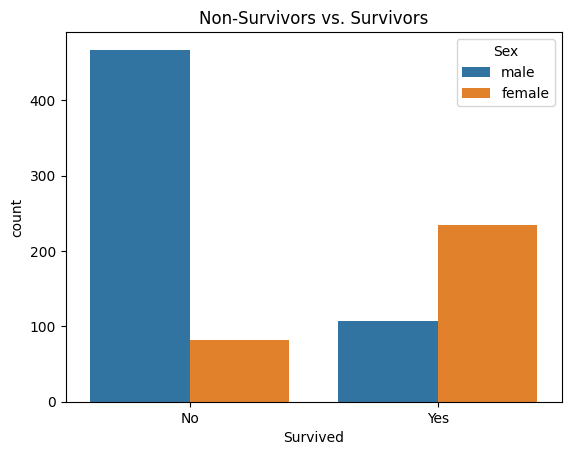

In [6]:
#Creating initial count plot in seaborn
ax = sns.countplot(data = df, x = "Survived", hue = "Sex")

#Changing x-tick labels so they reflect if a passenger survived or not
ax.set(xticks=range(len(survival_labels)), xticklabels=[i for i in survival_labels])

#Creating title
ax.set_title("Non-Survivors vs. Survivors")

ax

### Interpretation

From this graph, we can see that more female passengers survived than male passengers.

We can also see that roughly 2x as many female passengers survived as male passengers, but more than 4x as many male passengers died than female passengers.

The matplotlib library does not provide an aesthetically pleasing count plot, so no matplotlib plot is provided.


## Barplot

A barplot of the average number of "Parents or Children" for those that Survived vs. those that died.

Which group had a higher average number of Parents or Children?

### Seaborn Plots

Text(0.5, 1.0, 'Average # of Parents/Children by Survival')

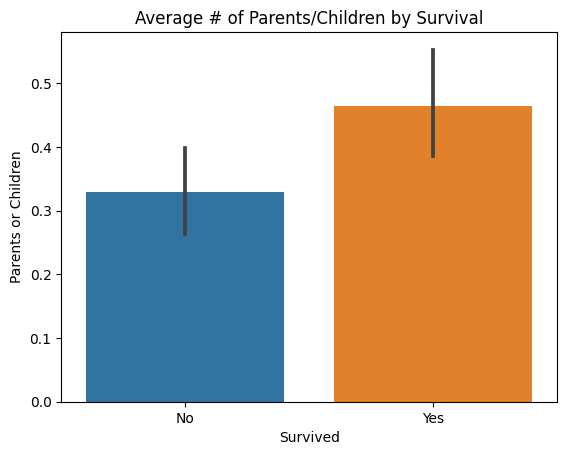

In [9]:
#Creating initial histogram
ax = sns.barplot(data = df, x = "Survived", y = "Parents or Children")

#Changing x-tick labels so they reflect if a passenger survived or not
ax.set(xticks=range(len(survival_labels)), xticklabels=[i for i in survival_labels])

ax.set_title("Average # of Parents/Children by Survival")

### Matplotlib

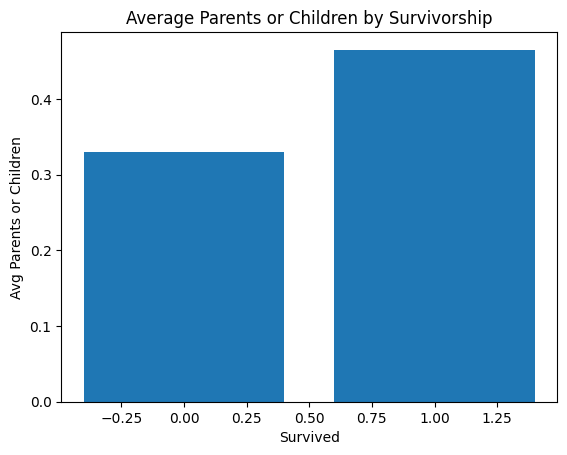

In [12]:
#Base matplotlib histogram
parent_child_averages = df.groupby("Survived")["Parents or Children"].mean()

fig, ax = plt.subplots()
ax.bar(parent_child_averages.index, parent_child_averages.values);
ax.set_ylabel('Avg Parents or Children')
ax.set_xlabel("Survived")
ax.set_title("Average Parents or Children by Survivorship");

### Interpretation

We can see from these graphs that those who survived on average had more parents or children than those who did not.

## Heatmap

Plot a correlation heatmap of all of the numeric columns

Which column had the highest positive correlation to the "Survived" column?

### Seaborn Plots

<ipython-input-15-f2703b7f9df6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


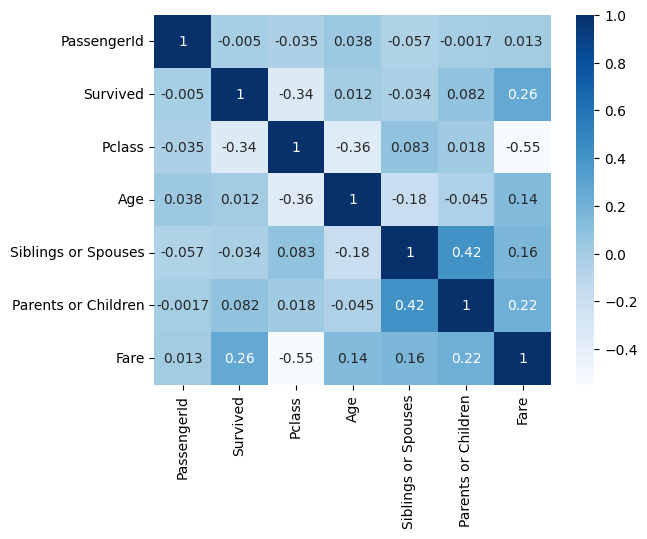

In [15]:
corr = df.corr()

# Make a heatmap of correlations
sns.heatmap(corr, cmap = 'Blues', annot = True);

### Interpretation

The highest correlation between survival and any other feature was Fare. Meaning that the more a passenger paid, the higher their chance of survival.